# Danish trade balance

**Importing packages.**

In [20]:
#Importing relevant packages
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import pandas as pd
import pydst
dst = pydst.Dst(lang='en')

**Creating dictionaries for later use.**

In [2]:
#Creating dictionaries 
columns_dict = {}
columns_dict['POST'] = 'Variable'
columns_dict['TID'] = 'Year'
columns_dict['LAND'] = 'Country'
columns_dict['INDUDBOP'] = 'ImportExport'
columns_dict['INDHOLD'] = 'Value'

var_dict = {} 
var_dict['GOODS (FOB)'] = 'Goods'
var_dict['SERVICES'] = 'Services'
var_dict['CURRENT ACCOUNT'] = 'Current account'

country_dict = {}
country_dict['United States'] = 'US'
country_dict['EU-28'] = 'EU'
country_dict['Norway'] = 'Norway'
country_dict['Germany'] = 'Germany'
country_dict['China'] = 'China'
country_dict['United Kingdom'] = 'UK'

**Retrieving data.**

In [3]:
#Retrieving the data through the API of DST and taking a quick look at it.
bb3 = dst.get_data(table_id = 'BB3', variables={'POST':['*'], 'LAND':['*'], 'TID':['*']})
bb3.head(5)

,POST,LAND,TID,INDUDBOP,INDHOLD
0,GOODS (FOB),European Union Institutions (excl. ECB and ESM),2009,Current receipts,0
1,GOODS (FOB),European Central Bank (ECB),2009,Current receipts,0
2,GOODS (FOB),European Stability Mechanism (ESM),2009,Current receipts,0
3,GOODS (FOB),INTERNATIONAL ORGANISATIONS (EXCL. EU INST.),2009,Current receipts,1
4,GOODS (FOB),AMERICA,2009,Current receipts,51841


# Read and clean data

**In this section we will clean the data by renamning rows and columns. We will furthermore select countries and areas, which we will examine.**

In [5]:
#Renaming the column names using our predefined dictionary.
bb3.rename(columns=columns_dict,inplace=True)
bb3.head(5)

,Variable,Country,Year,ImportExport,Value
0,GOODS (FOB),European Union Institutions (excl. ECB and ESM),2009,Current receipts,0
1,GOODS (FOB),European Central Bank (ECB),2009,Current receipts,0
2,GOODS (FOB),European Stability Mechanism (ESM),2009,Current receipts,0
3,GOODS (FOB),INTERNATIONAL ORGANISATIONS (EXCL. EU INST.),2009,Current receipts,1
4,GOODS (FOB),AMERICA,2009,Current receipts,51841


In [6]:
#Renaming the variables and keeping the ones of interest (Goods, Services and Current Account)
for key,value in var_dict.items():
   bb3.Variable.replace(key,value,inplace=True)

I = False
for key,value in var_dict.items():
    I = I | (bb3.Variable == value)
bb3 = bb3[I]

In [8]:
#Selecting countries and areas for further analysis using country_dict.
for key,value in country_dict.items():
   bb3.Country.replace(key,value,inplace=True)

I = False
for key,value in country_dict.items():
    I = I | (bb3.Country == value)
bb3 = bb3[I]

bb3.head(5)

,Variable,Country,Year,ImportExport,Value
23,Goods,EU,2009,Current receipts,333846
54,Goods,China,2009,Current receipts,11950
1341,Goods,EU,2006,Current receipts,374576
1372,Goods,China,2006,Current receipts,7032
1382,Goods,Germany,2006,Current receipts,88383


In [9]:
#Converting the type of 'Value' to floats
bb3.Value = bb3.Value.astype('float')
bb3.dtypes

Variable         object
Country          object
Year              int64
ImportExport     object
Value           float64
dtype: object

# Analysis

**Analysis of the cleaned dataset.**

In [19]:
#Summary statistics of the data after the clean up.
bb3.groupby('Country').agg(['mean','std']).round(2)

Year            Value           
         mean   std       mean        std
Country                                  
China    2012  4.37   24537.80   14091.72
EU       2012  4.37  423260.13  215073.55
Germany  2012  4.37   97719.84   50032.97
Norway   2012  4.37   47728.42   23047.97
UK       2012  4.37   61478.89   32649.59
US       2012  4.37   75696.53   42767.39

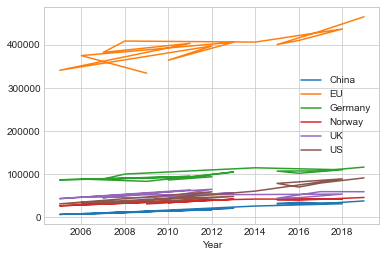

In [15]:
def plot(df):
    df_indexed = df.set_index('Year')
    I = df_indexed.Variable == 'Goods'
    df_indexed.ImportExport == 'Current receipts'
    df_indexed[I].groupby(['Country'])['Value'].plot(legend=True);
    
plot(bb3)

# Conclusive remarks

We are fully aware that this project is not a sufficient answer to the assignment. We experienced som difficulties and ran out of time. This version is not the final version. We will redo and correct this project before the deadline for the exam. 